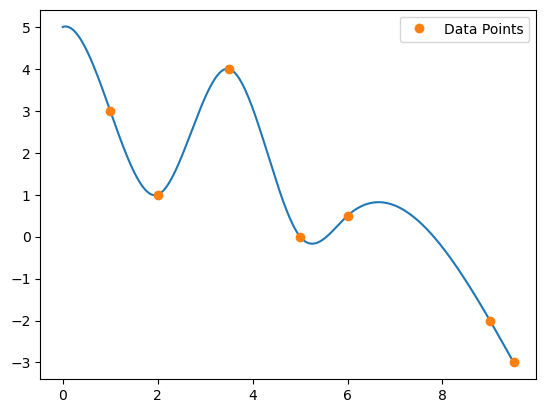

In [64]:
import numpy as np
import matplotlib.pyplot as plt

x_space_c = []

#[t_i, y_i] 
data = np.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]]) 
N = data.shape[0] - 1

#liczymy h_i oraz b_i 
h = []
b = []

for i in range(N):
    h_i = data[i + 1, 0] - data[i][0]
    h.append(h_i)

for j in range(N):
    b_i = (6 / h[j]) * (data[j + 1][1] - data[j][1])
    b.append(b_i)

#liczymy u_1 oraz v_1
u = []
v =[]

u_1 = 2 * (h[0] + h[1])
u.append(u_1)
v_1 = b[1] - b[0]
v.append(v_1)

#liczymy pozostałe u i v
for i in range(1, N - 1):
    u_i = 2 * (h[i] + h[i + 1]) - ((h[i])**2 / u[i - 1])
    u.append(u_i)


for j in range(1, N - 1):
    v_i = b[j + 1] - b[j] - ((h[j] * v[j - 1]) / u[j - 1])
    v.append(v_i)

#liczymy z_i
z = [0] * (N + 1)
z[N] = 0

for i in range(N - 1, 0, -1):
    z[i] = (v[i - 1] - (h[i] * z[i + 1])) / u[i - 1]


#liczymy współczynniki A-i, B_i, C_i
A = []
for i in range(N):
    a_i = (z[i + 1] - z[i]) / (6 * h[i])
    A.append(a_i)

B = []
for i in range(N):
    b_i = z[i] / 2 
    B.append(b_i)

C = []
for i in range(N):
    c_i = ((-1 * h[i]) * (z[i + 1] + (2 * z[i])) / 6) +  ((data[i + 1][1] - data[i][1]) / h[i])
    C.append(c_i)

t_i = [data[i][0] for i in range(len(data))]
y_i = [data[i][1] for i in range(len(data))]
x = np.linspace(0, 10, 100)

lista = []



for i in range(N):
    if i == 0:
        z = np.linspace(0, data[i + 1, 0], 100)
    elif i == len(data):
       z = np.linspace(data[i, 0], 10, 100)
    else:
      z = np.linspace(data[i, 0], data[i + 1, 0], 100)
    s = data[i][1] + (z - data[i][0]) * (C[i] + (z - data[i][0]) * (B[i] + (z - (data[i][0])) * A[i])) 
    lista.extend(s)
    x_space_c.extend(z)



plt.plot(x_space_c, lista)
plt.plot(t_i, y_i, 'o', label = 'Data Points')
plt.legend()



In [65]:
import numpy as np
import matplotlib.pyplot as plt 



wezly = [data[i][0] for i in range(len(data))]
x_space_l = np.linspace(0, 10, 100)
y = [data[i][1] for i in range(len(data))]

def l(x, wezly, stopien):
    suma = 0 
    for i in range(stopien + 1):
        iloczyn = 1 
        for j in range(stopien + 1):
            if i!=j:
                iloczyn *= (x - wezly[j])/ (wezly[i] - wezly[j])
        else:
            suma += y[i] * iloczyn 
    else:
        return suma

lagrange = [l(x, wezly, len(wezly) - 1) for x in x_space_l]


In [66]:

x_space_lin = []
data_lin = np.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
lista_lin = []

for i in range(len(data_lin) - 1):
    if i == 0:
        z = np.linspace(0, data_lin[i + 1, 0], 100) 
    elif i == len(data_lin) - 2:
        z = np.linspace(data[i, 0], 10, 100) 
    else:
         z = np.linspace(data_lin[i, 0], data_lin[i + 1, 0], 100) 
    s = ((data[i + 1, 1] - data_lin[i, 1])) / (data_lin[i + 1, 0] - data_lin[i, 0]) * (z - data_lin[i, 0]) + data_lin[i, 1]
    lista_lin.extend(s)
    x_space_lin.extend(z)


#plt.plot(x_space_lin, lista_lin)

#plt.scatter([data_lin[i][0] for i in range(data_lin.shape[0])], [data_lin[i][1] for i in range(data_lin.shape[0])])
#plt.show


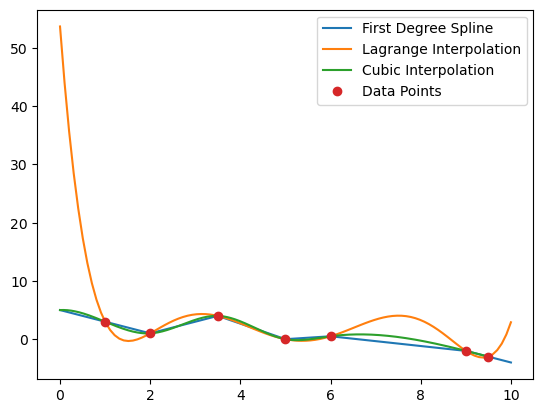

In [67]:
plt.plot(x_space_lin, lista_lin, label = 'First Degree Spline')
plt.plot(x_space_l, lagrange, label = 'Lagrange Interpolation')
plt.plot(x_space_c, lista, label = 'Cubic Interpolation')
plt.plot(t_i, y_i, 'o', label = 'Data Points')
plt.legend()
plt.show()

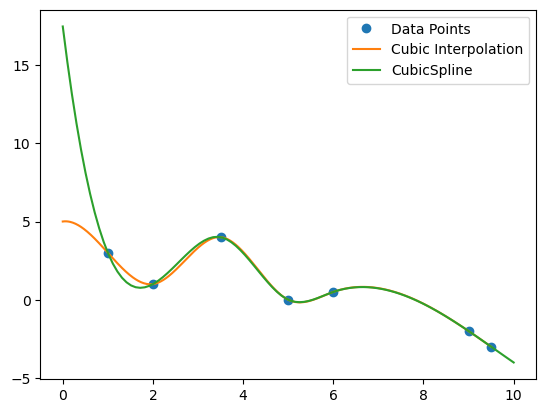

In [71]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(t_i, y_i)
y_interp = cs(x)

plt.plot(t_i, y_i, 'o', label = 'Data Points')
plt.plot(x_space_c, lista, label = 'Cubic Interpolation')
plt.plot(x, y_interp, '-', label='CubicSpline')
plt.legend()
plt.show()

Wykresy nie pokrywają się ze względu na warunki brzegowe. Funkcja CubicSpline domyślnie używa 'not-a-knot', gdyby uzyć warunku 'natural', wykresy by się pokrywały. 